### Import modules

In [1]:
# Get zoom-able notebook; must be called before importing the module
%matplotlib notebook 
# IPython extension to autoreload modules
#%load_ext autoreload 
# 2 = reload all modules every time before executing the Python code typed
#%autoreload 2 

import seapy
import scipy
import numpy as np
# Note that splitting up matplotlib importation between cells can cause plots to not appear!
import matplotlib as mpl
import matplotlib.dates as dates
from matplotlib.dates import num2date, date2num, datetime
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.path import Path
from mpl_toolkits.basemap import Basemap

## Plotting protocol: example (don't edit)

<IPython.core.display.Javascript object>


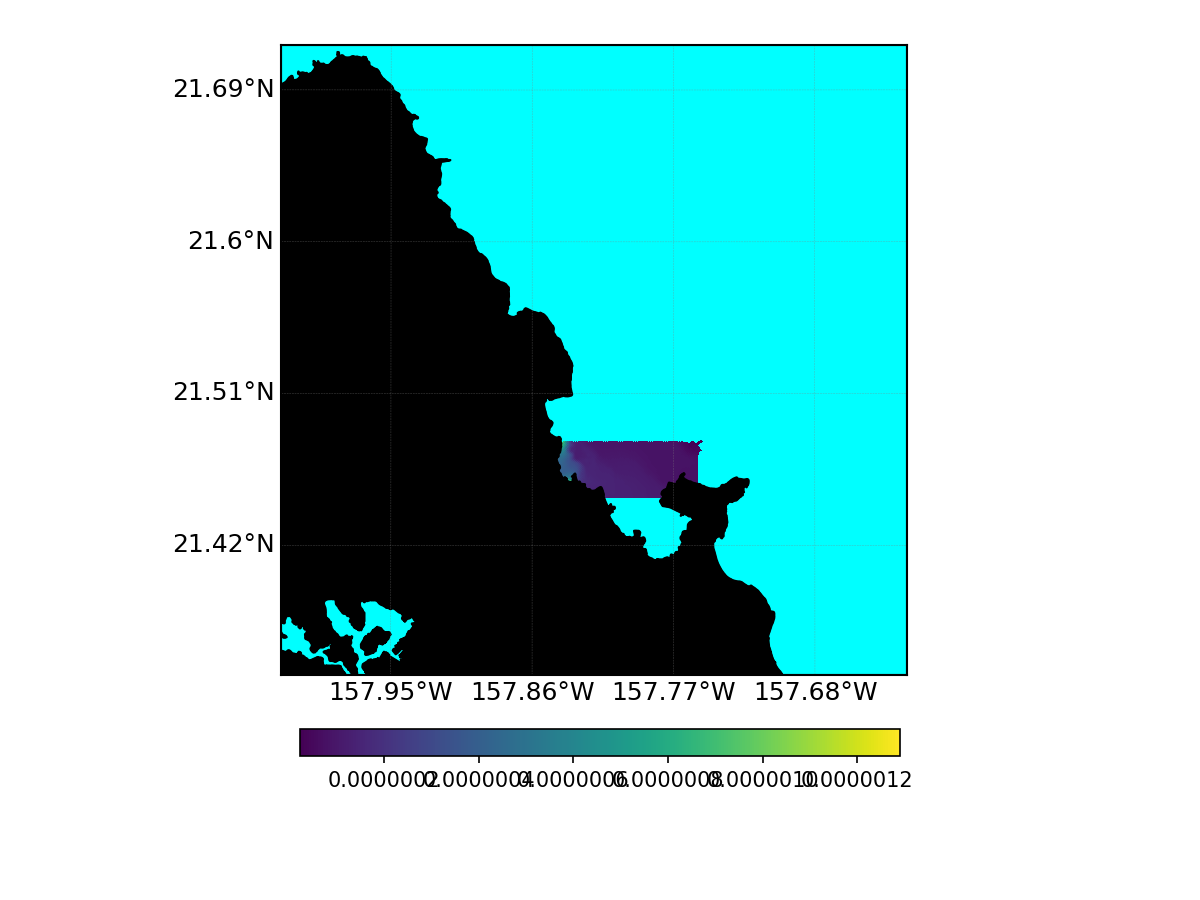

In [27]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-2013-seasonal-netcdf/CB_all_var.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-2013-seasonal-netcdf/CB_all_var.nc')
t = nc.variables['nsmz'][20,5,:,:] # dims: ocean_time = 61, s_rho = 20, y = 90, x = 190
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t)
mb.land()
mb.colorbar()
plt.show()

## Validation plots

Before proceeding, I transfered all files on my local to the server. I may use these, or not- but I am running out of space on my local machine, as these netCDFs are so hefty: 
```sh
scp -r hioekg-2013 lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript
# Not using for this but still storing here...
scp -r hioekg-2014 lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript
# Later, for inter-annual plots:
scp -r hioekg-compare-years lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript

```

##### Wet season: October - April

In terminal:

```sh
cd '/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/'

ncra hioekg_monthly_mean_04750.nc hioekg_monthly_mean_04780.nc hioekg_monthly_mean_04810.nc hioekg_monthly_mean_04840.nc hioekg_monthly_mean_05020.nc hioekg_monthly_mean_05050.nc hioekg_monthly_mean_05080.nc hioekg_wet_season_mean_2013.nc
```

##### Dry season: May - September

```sh
cd '/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/'

ncra hioekg_monthly_mean_04870.nc hioekg_monthly_mean_04900.nc hioekg_monthly_mean_04930.nc hioekg_monthly_mean_04960.nc hioekg_monthly_mean_04990.nc hioekg_dry_season_mean_2013.nc
```

*Note:* I decided against displaying a proportional "wet vs. dry" figure, and instead opted for a combined figure showing wet *and* dry concentrations side-by-side. I had some issues with the execution of the ncbo command on the full grid- i.e., a floating point error- and I considered that the average reader would be capable of discerning visual differences from side-by-side images. And this way, they won't hav to dig through the text to find the concentrations for the presented variable. 

### nbact: wet vs. dry (2013) (for nbact_seasonal figure)

For this plot, and the following, I am adapting the simple seapy plotting protocol in the example above.

<IPython.core.display.Javascript object>


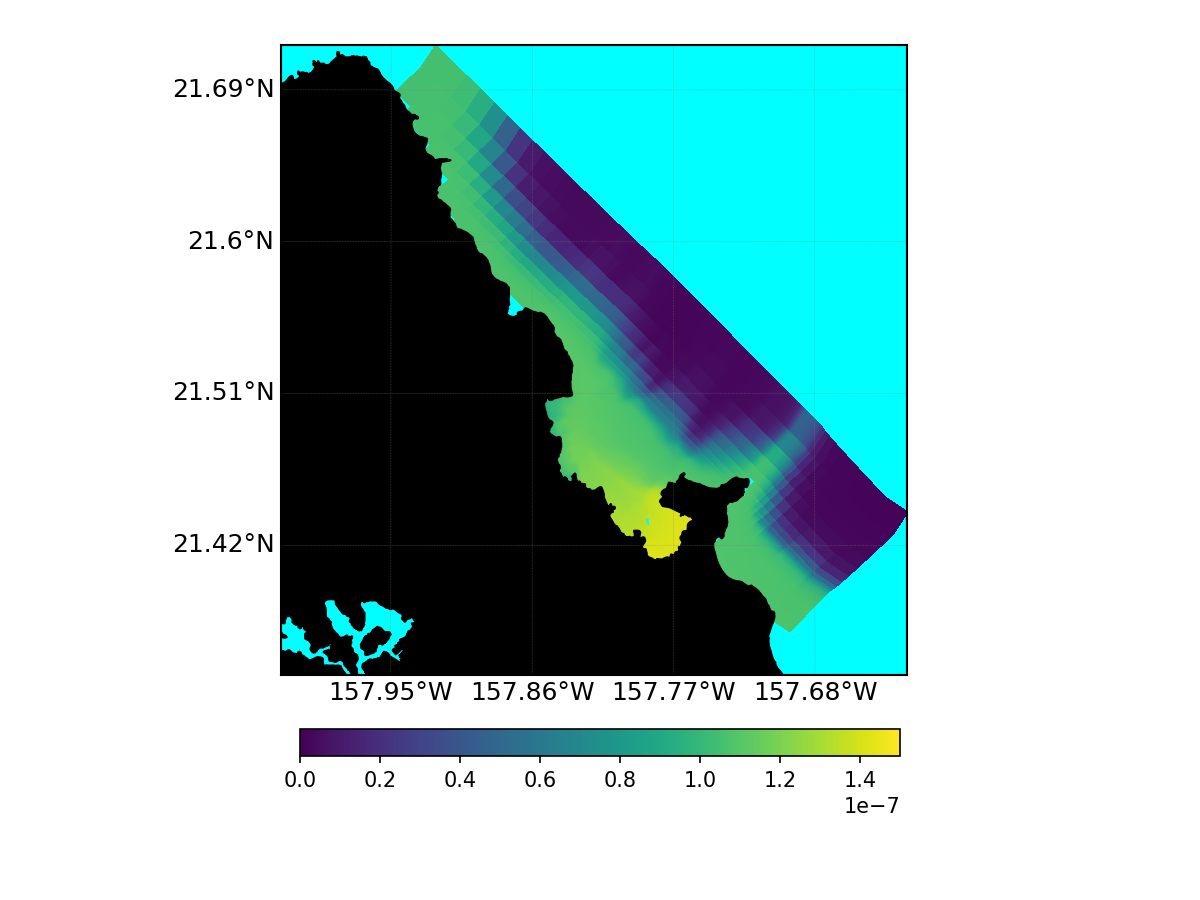

In [40]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['nbact'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


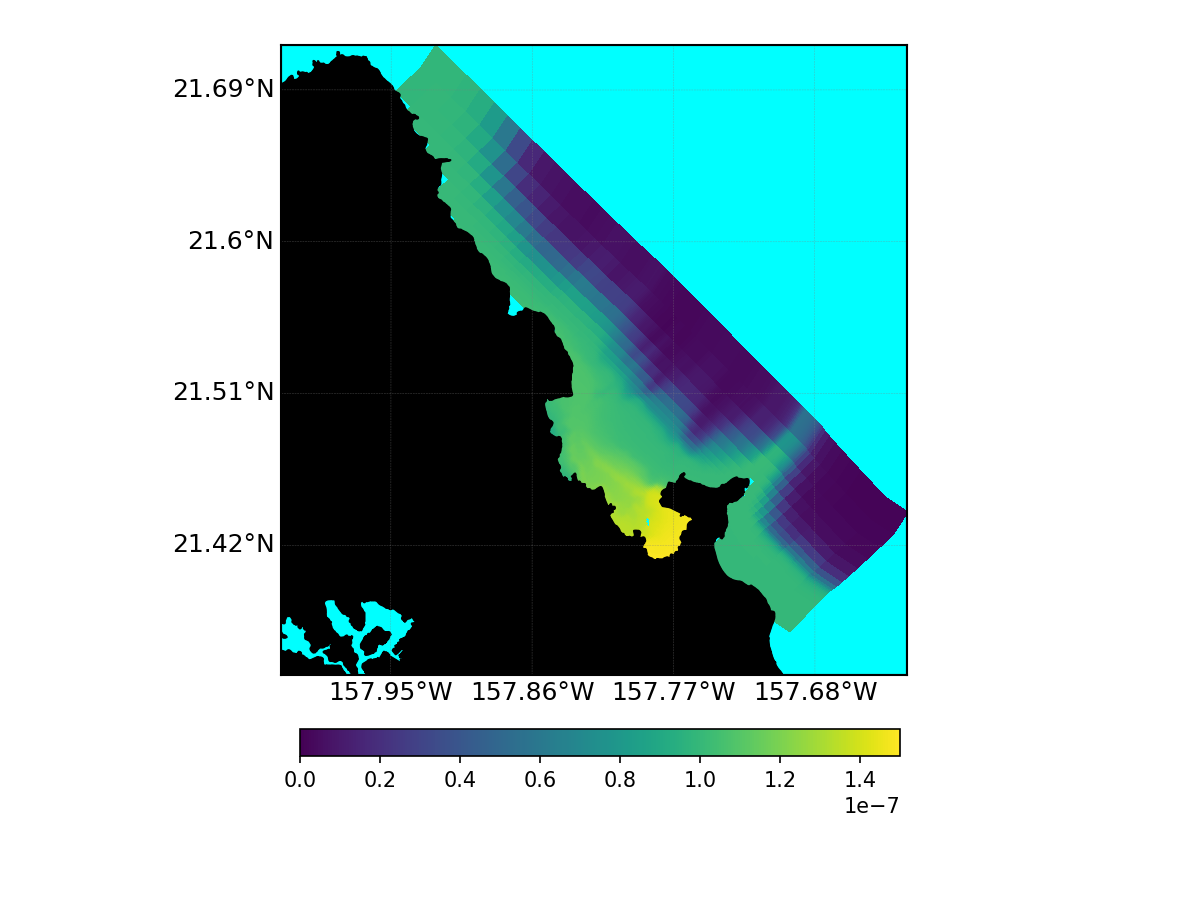

In [39]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['nbact'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

### nsm: wet vs. dry (2013) (for nsm_seasonal figure)

<IPython.core.display.Javascript object>


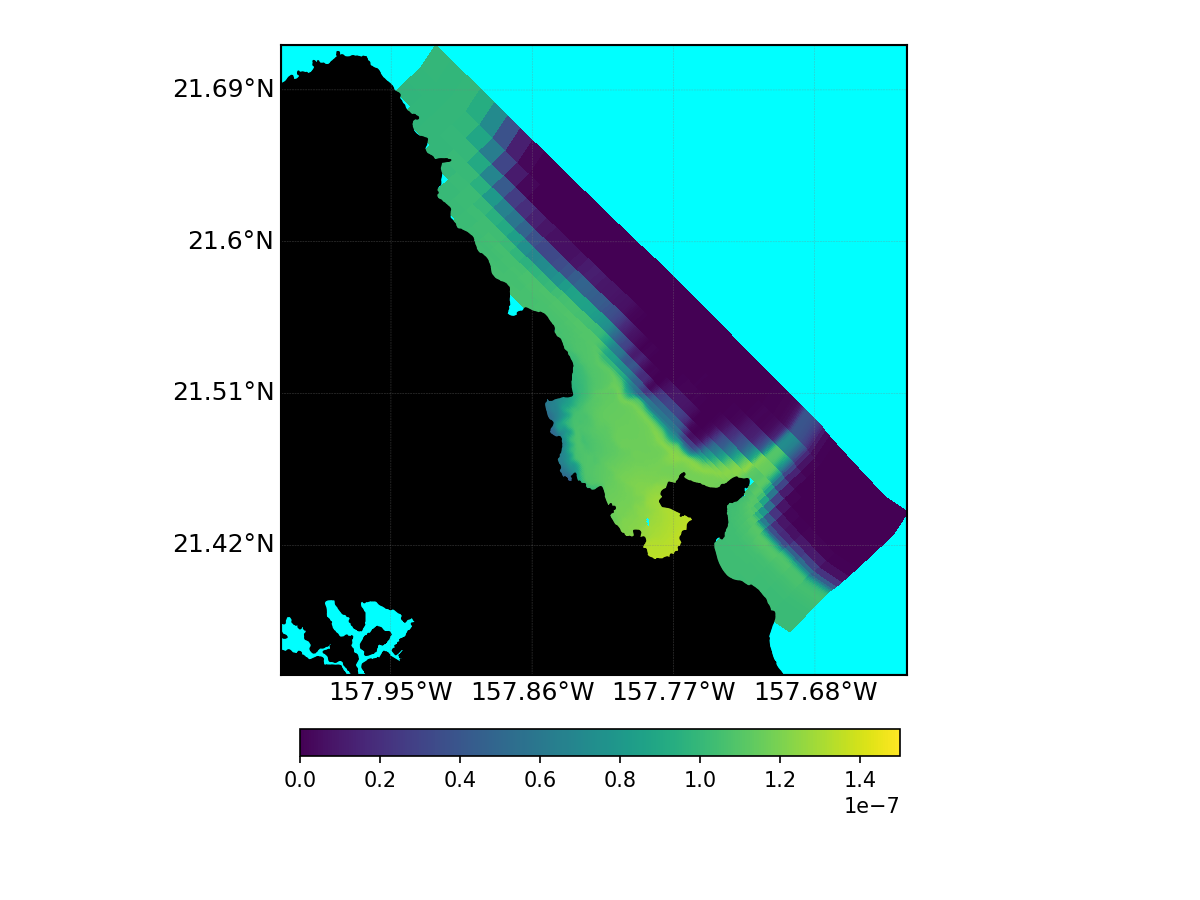

In [38]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['nsm'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


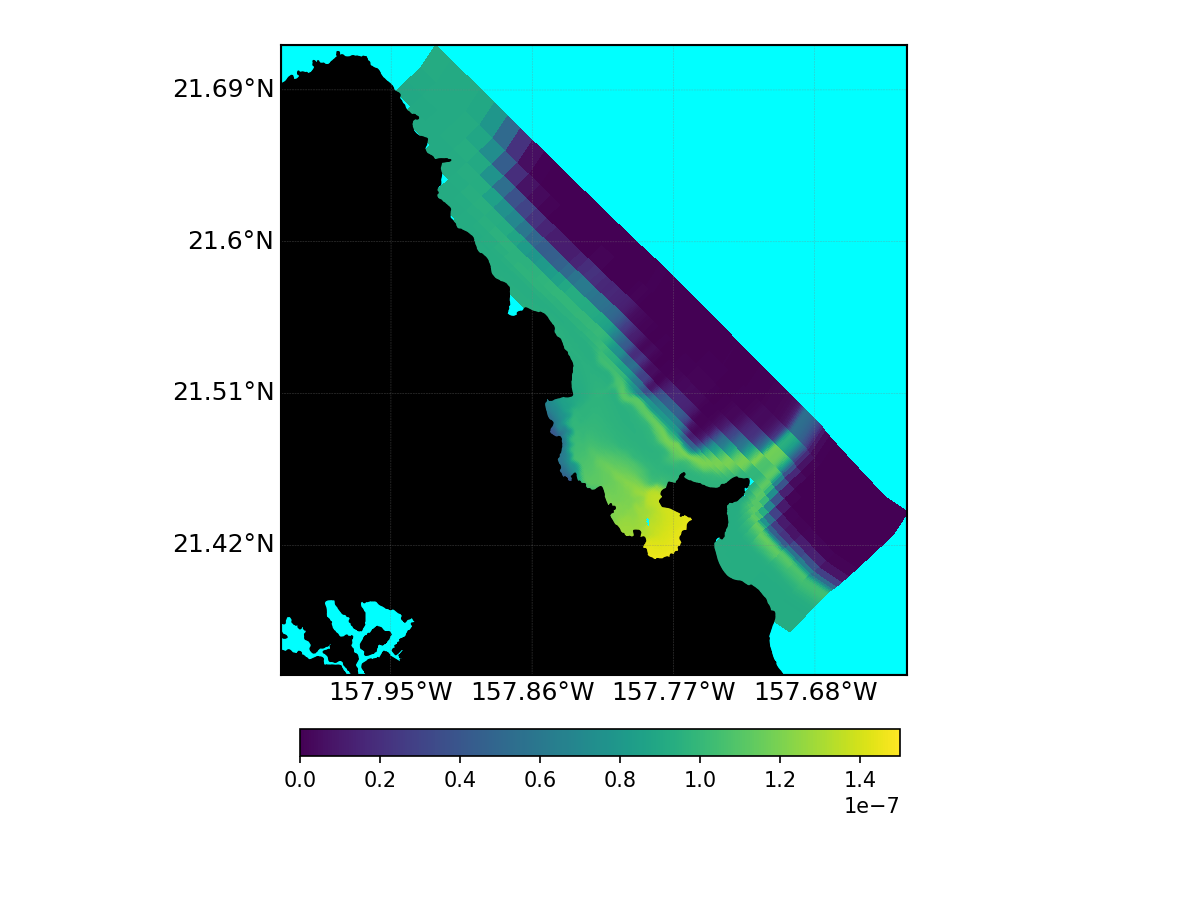

In [37]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['nsm'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

### nh4: wet vs. dry (2013 for nutrient_seasonal figure, inset A)

<IPython.core.display.Javascript object>


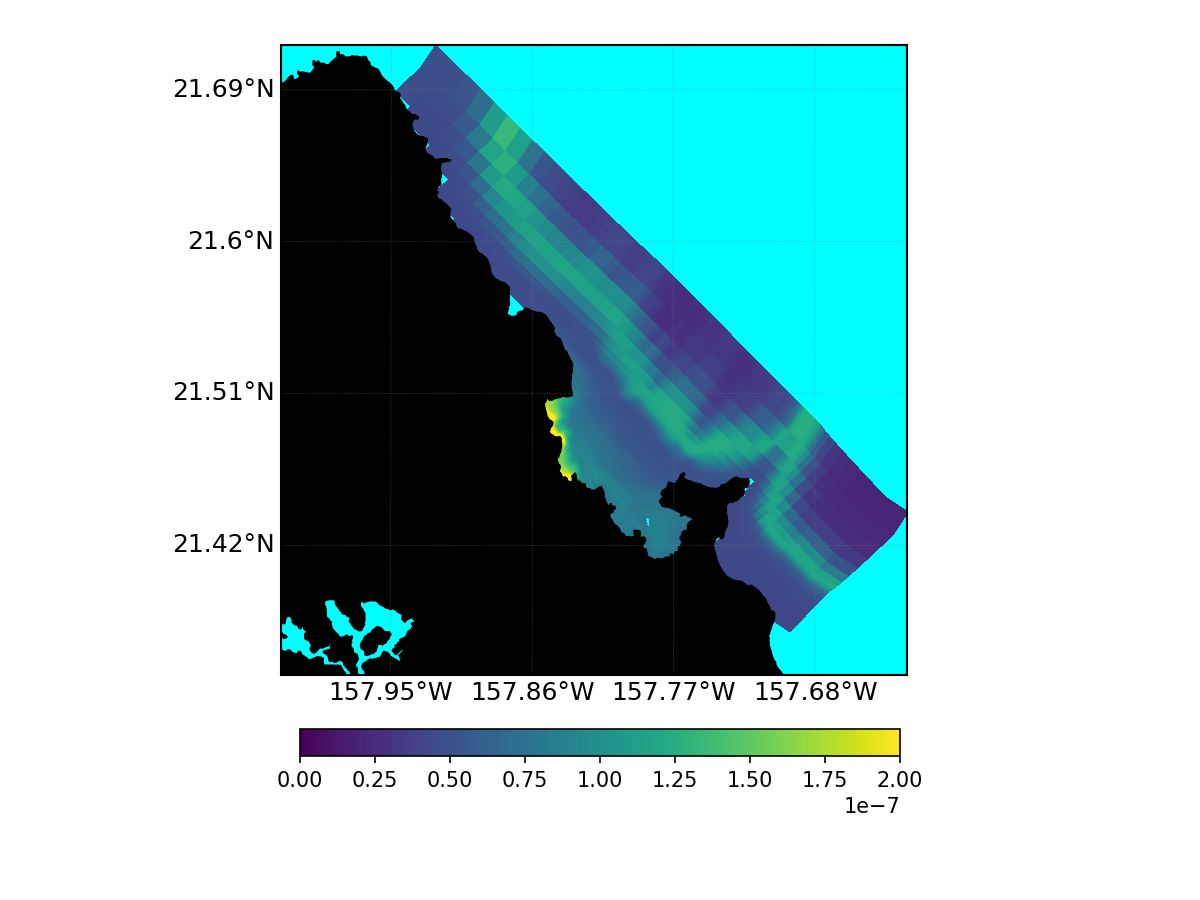

In [21]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['nh4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.0000002)
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


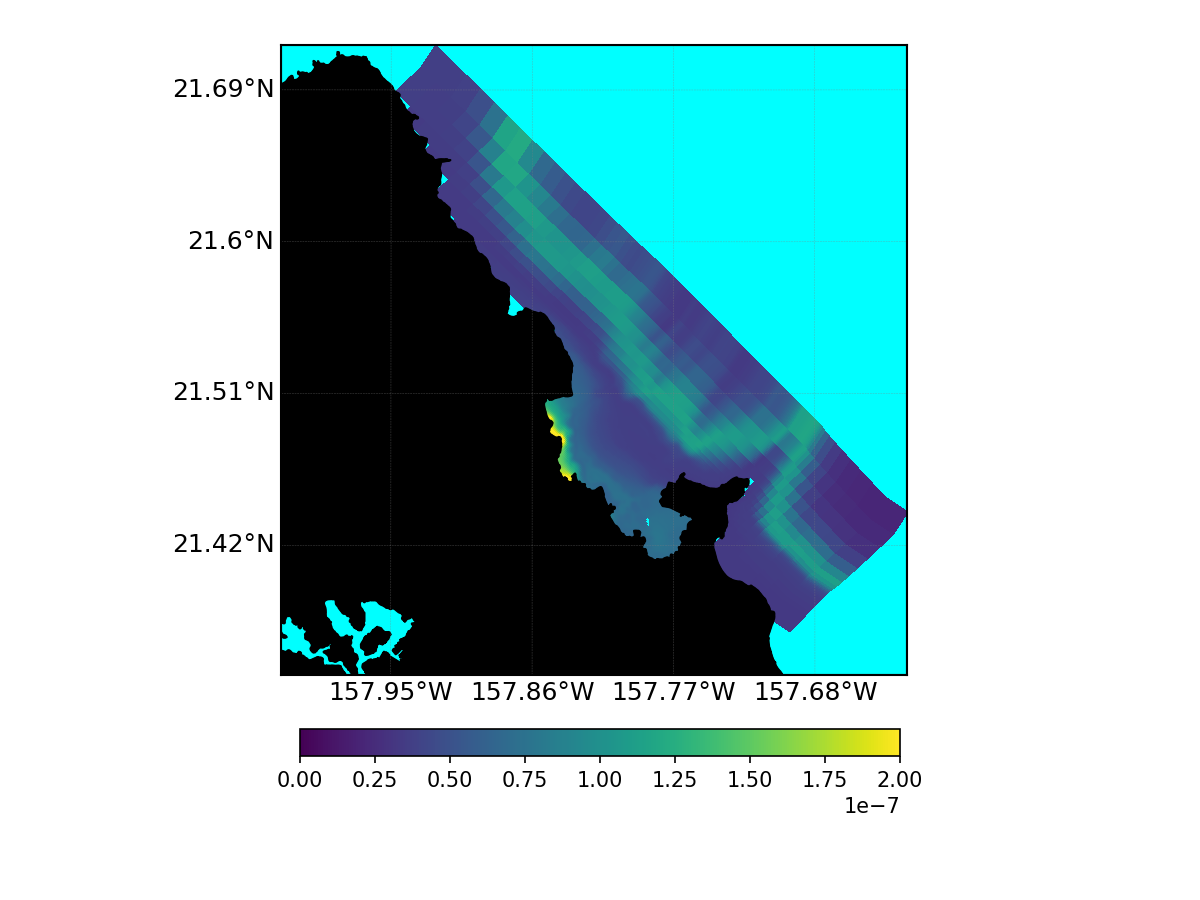

In [22]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['nh4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.0000002)
mb.land()
mb.colorbar()
plt.show()

### sio4: wet vs. dry (2013 for nutrient_seasonal figure, inset B)

<IPython.core.display.Javascript object>


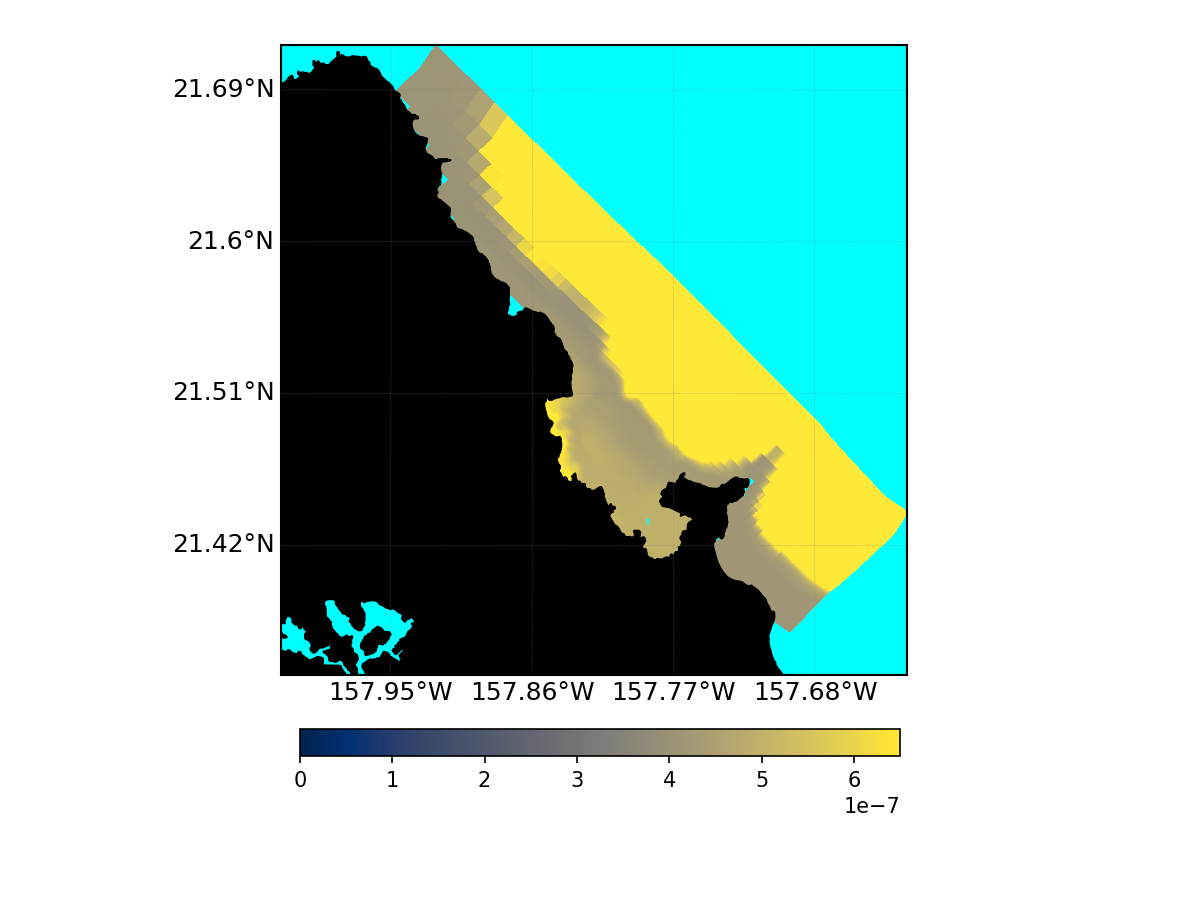

In [25]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['sio4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000065, cmap = 'cividis')
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


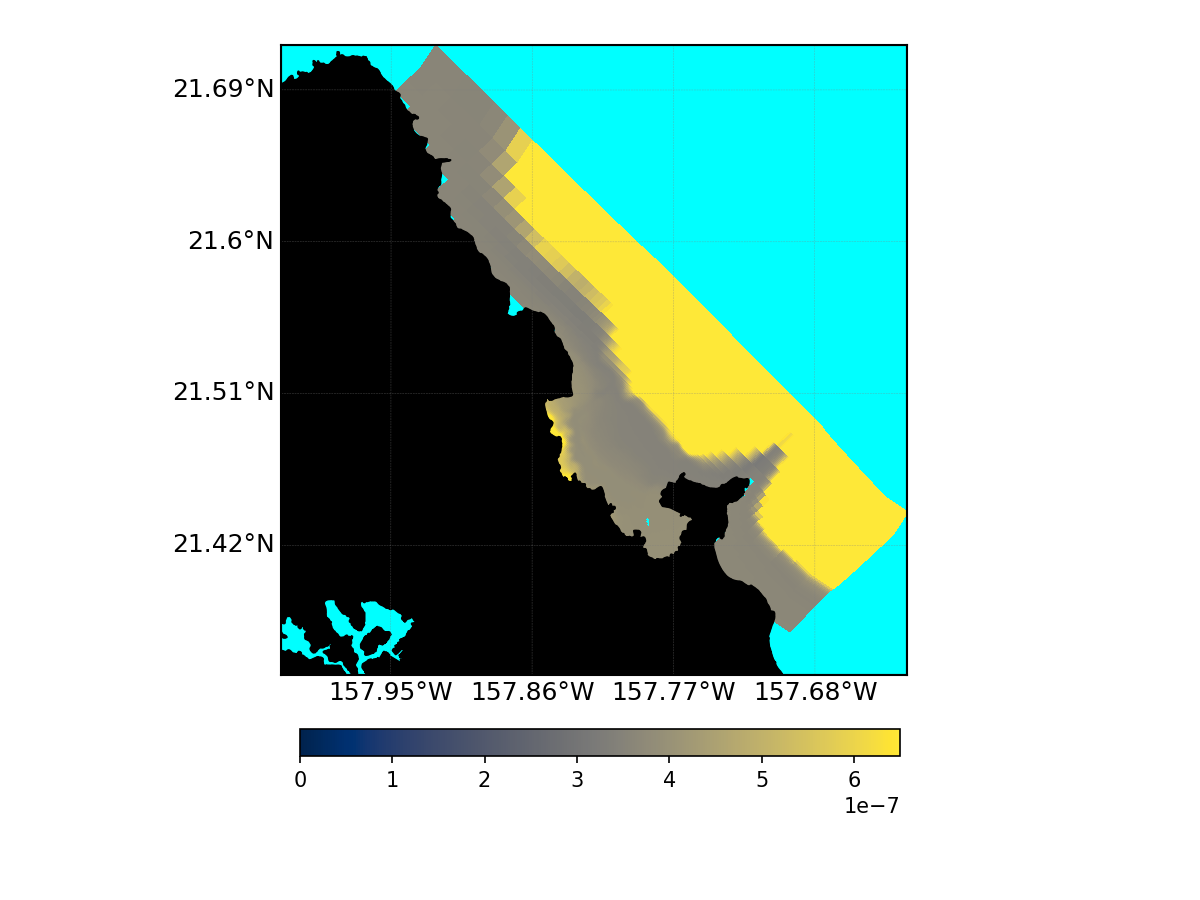

In [26]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['sio4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000065, cmap = 'cividis')
mb.land()
mb.colorbar()
plt.show()

## Inter-annual key nutrients: early spring (Feb, Mar, Apr)

In terminal:

```sh
# Early spring 2013

cd hioekg-2013

ncra February_4780/hioekg_monthly_mean_04780.nc March_4810/hioekg_monthly_mean_04810.nc April_4840/hioekg_monthly_mean_04840.nc hioekg_early_spring_2013.nc

mv hioekg_early_spring_2013.nc ../hioekg-compare-years

# Early spring 2014

cd ../hioekg-2014

ncra February_5145/hioekg_monthly_mean_05145.nc March_5175/hioekg_monthly_mean_05175.nc April_5205/hioekg_monthly_mean_05205.nc hioekg_early_spring_2014.nc

mv hioekg_early_spring_2014.nc ../hioekg-compare-years


#### nh4: 2013 vs. 2014

<IPython.core.display.Javascript object>


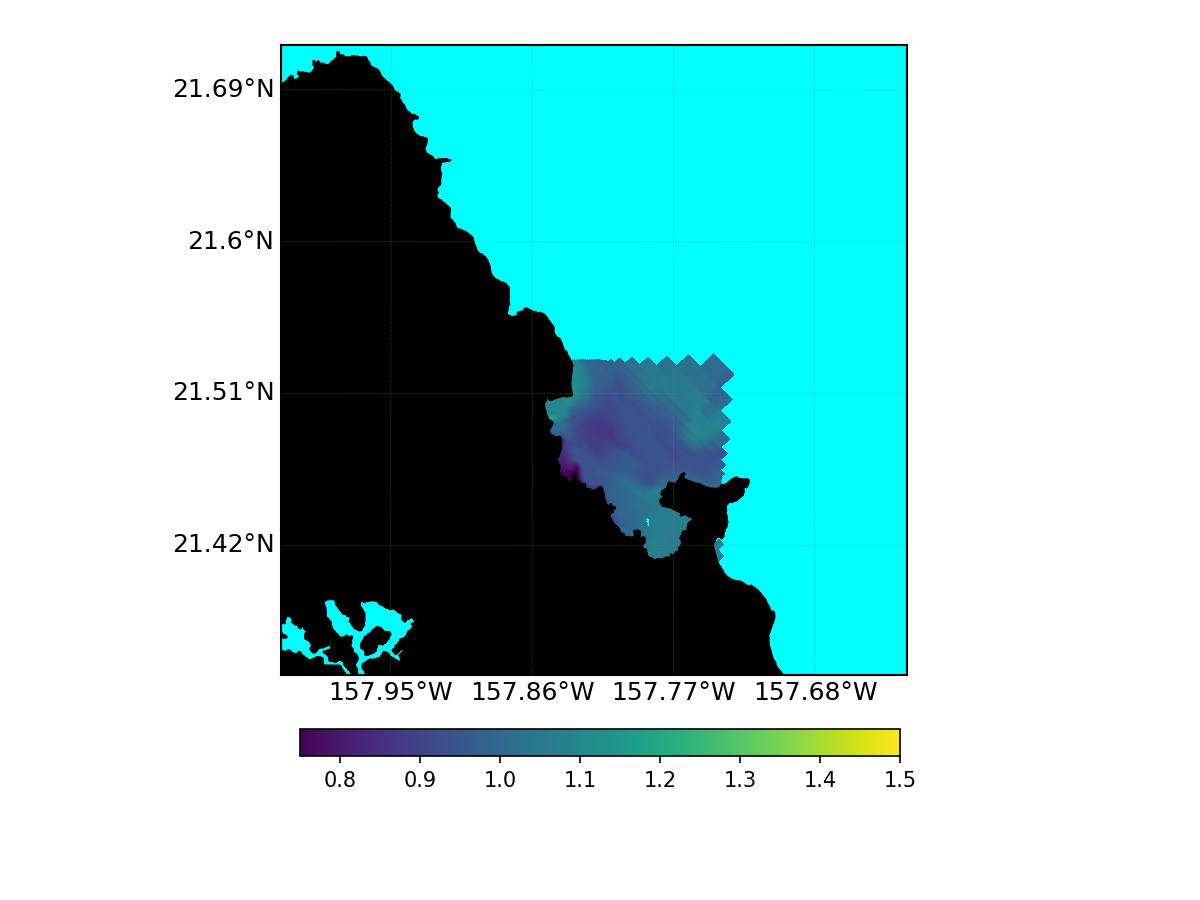

In [8]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['nh4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 1.5)
mb.land()
mb.colorbar()
plt.show()

#### no3: 2013 vs. 2014

<IPython.core.display.Javascript object>


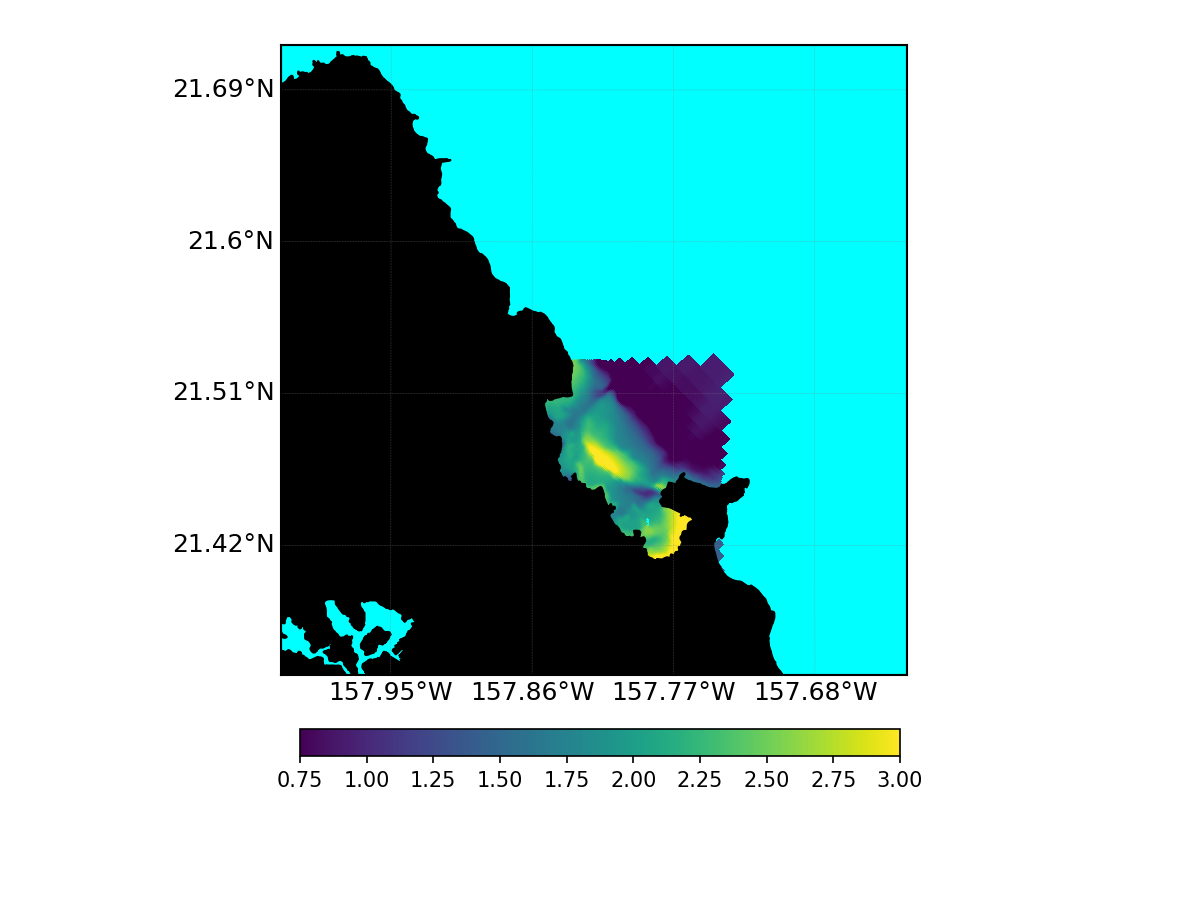

In [7]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['no3'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 3)
mb.land()
mb.colorbar()
plt.show()

#### po4: 2013 vs. 2014

<IPython.core.display.Javascript object>


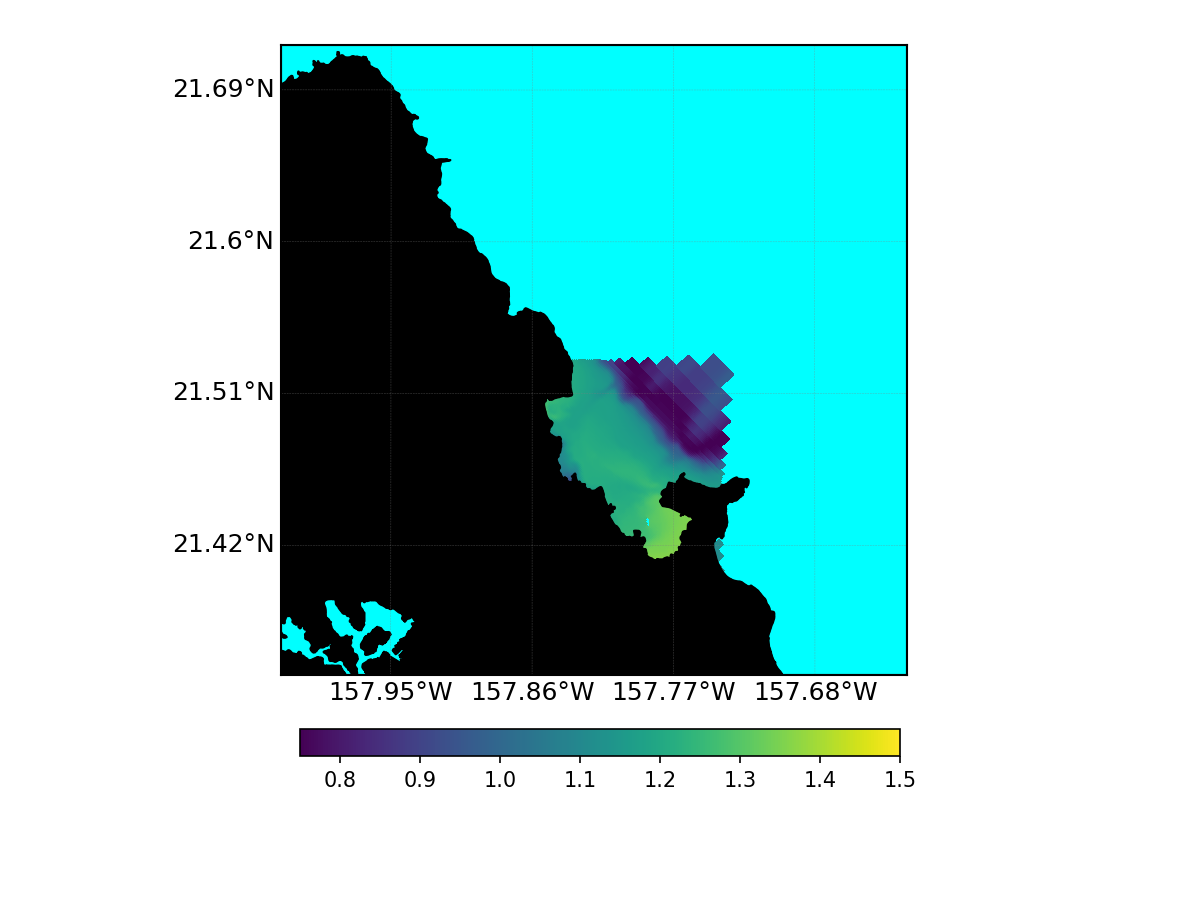

In [5]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['po4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 1.5)
mb.land()
mb.colorbar()
plt.show()

#### sio4: 2013 vs. 2014

/share/apps/miniconda3/envs/frinkiac/lib/python3.7/site-packages/seapy-0.4.2-py3.7-linux-x86_64.egg/seapy/model/grid.py:456: UserWarning: could not compute grid depths.
  warn("could not compute grid depths.")
/share/apps/miniconda3/envs/frinkiac/lib/python3.7/site-packages/seapy-0.4.2-py3.7-linux-x86_64.egg/seapy/model/grid.py:507: UserWarning: could not compute grid thicknesses.
  warn("could not compute grid thicknesses.")


<IPython.core.display.Javascript object>


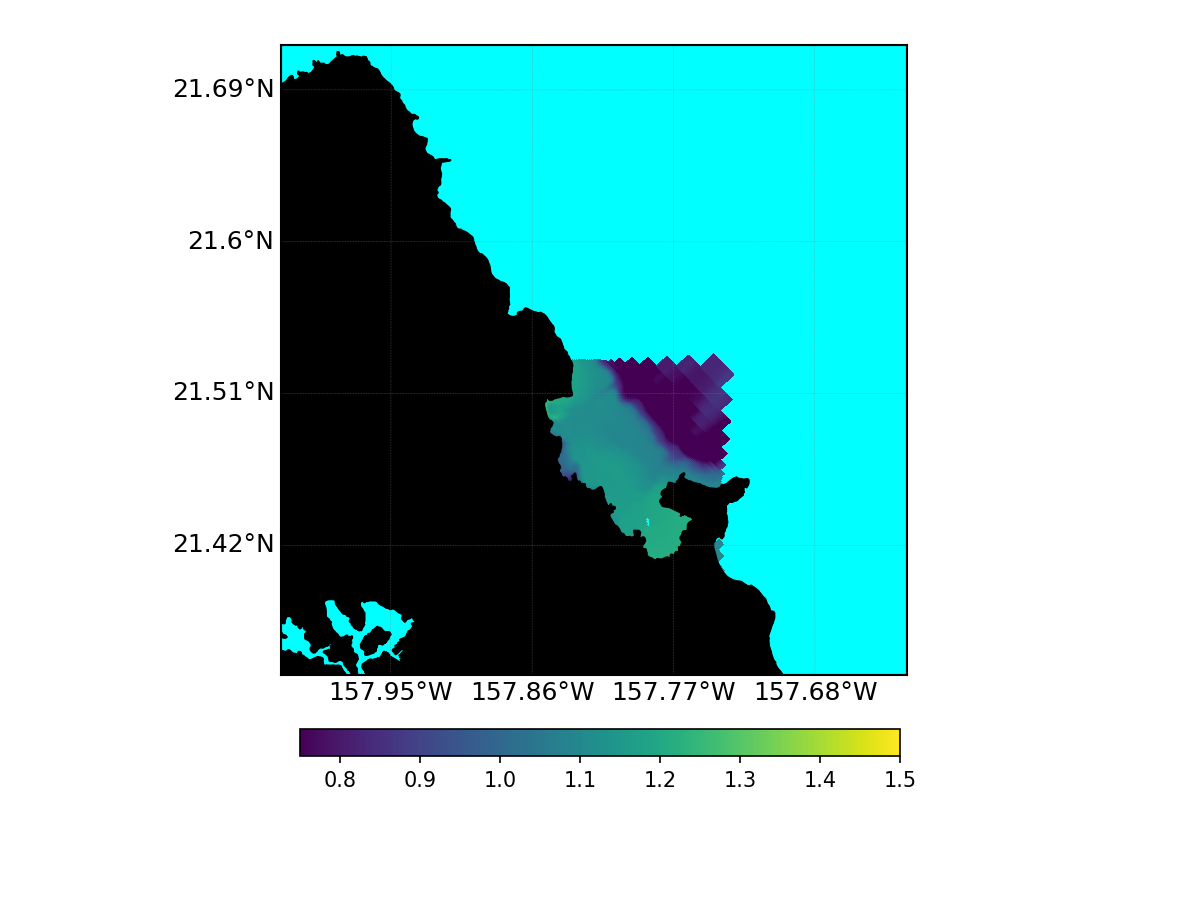

In [4]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['sio4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 1.5)
mb.land()
mb.colorbar()
plt.show()

##### Scratch: no3 seasonal 2013

<IPython.core.display.Javascript object>


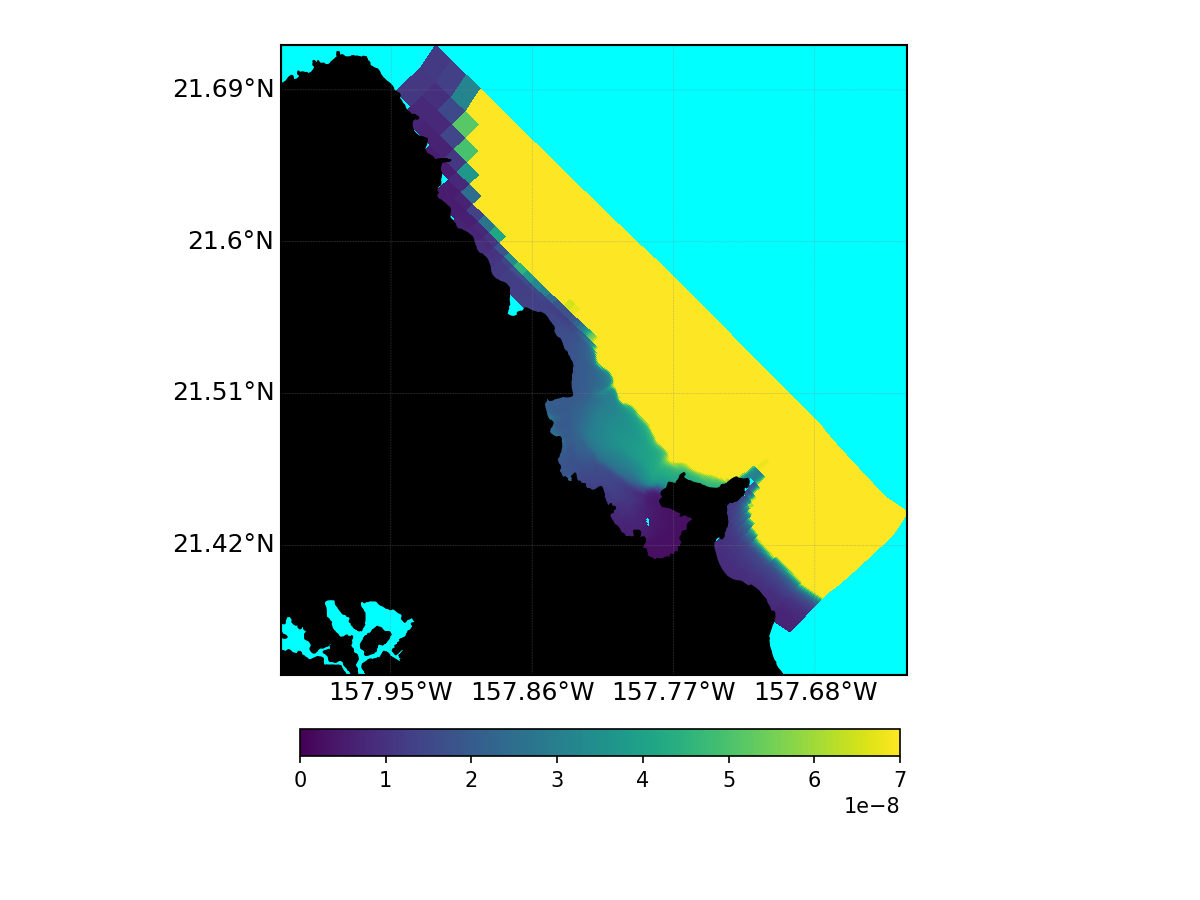

In [25]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['no3'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000007)
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


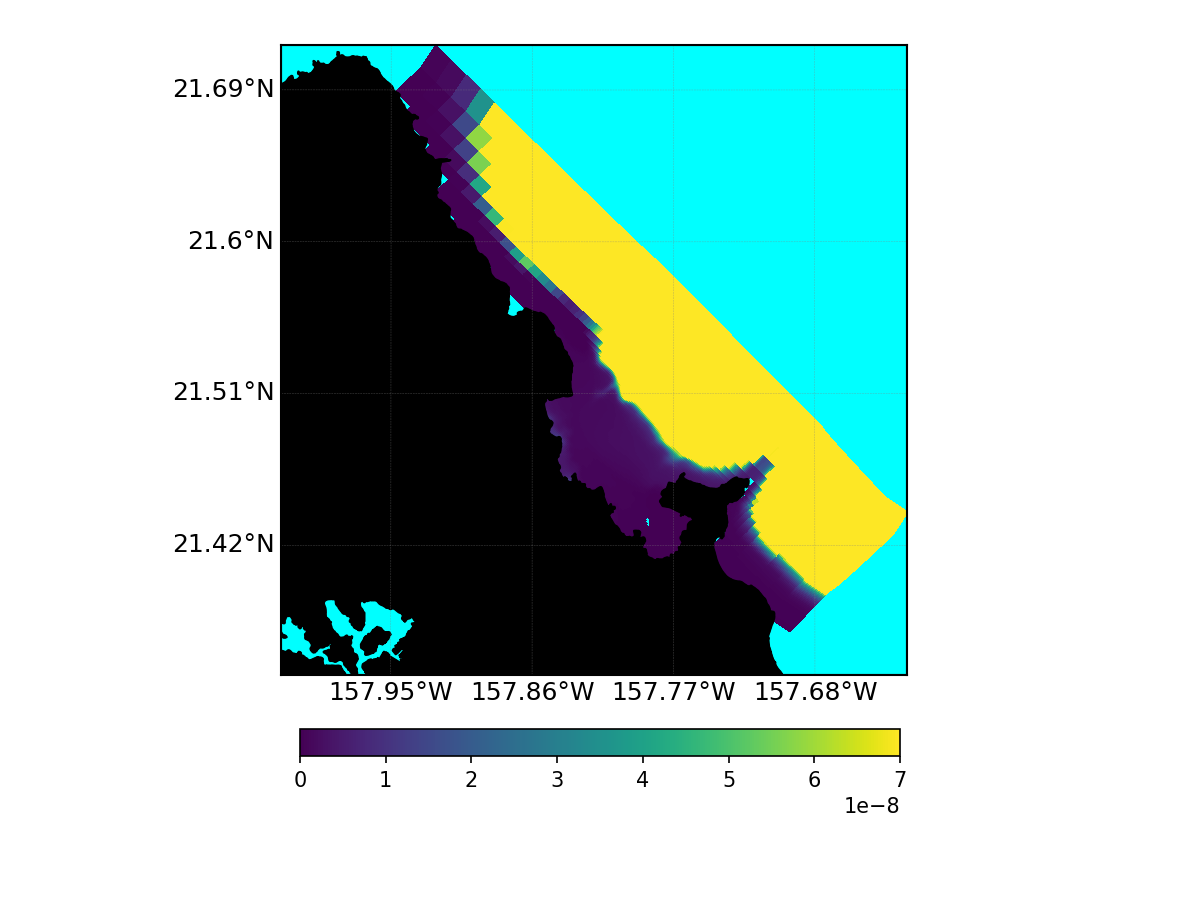

In [26]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['no3'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000007)
mb.land()
mb.colorbar()
plt.show()